In [1]:
import matplotlib.pyplot as plt
import torch

from tensorframes.nn.embedding.radial import BesselEmbedding, GaussianEmbedding
from tensorframes.nn.envelope import EnvelopeCosine, EnvelopePoly

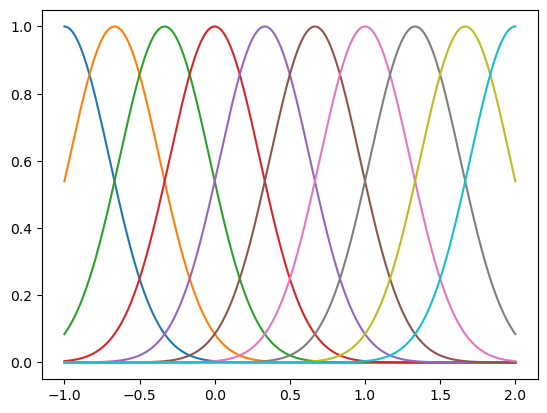

In [2]:
gauss = GaussianEmbedding(
    num_gaussians=10,
    normalized=False,
    minimum_initial_range=-1,
    maximum_initial_range=2,
    gaussian_width=0.3,
)

x = torch.linspace(-1, 2, 1000)
y = gauss.compute_embedding(x[:, None])

plt.plot(x, y.detach().numpy())
plt.show()

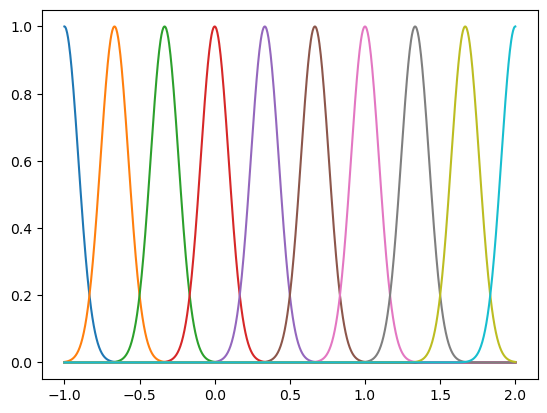

In [3]:
gauss = GaussianEmbedding(
    num_gaussians=10,
    normalized=False,
    minimum_initial_range=-1,
    maximum_initial_range=2,
    intersection=0.2,
)

x = torch.linspace(-1, 2, 1000)
y = gauss.compute_embedding(x[:, None])

plt.plot(x, y.detach().numpy())
plt.show()

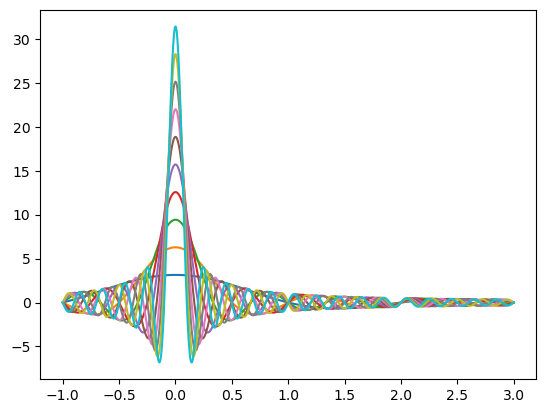

In [4]:
bessel = BesselEmbedding(num_frequencies=10)

x = torch.linspace(-1, 3, 1000)
y = bessel.compute_embedding(x[:, None])

plt.plot(x, y.detach().numpy())
plt.show()

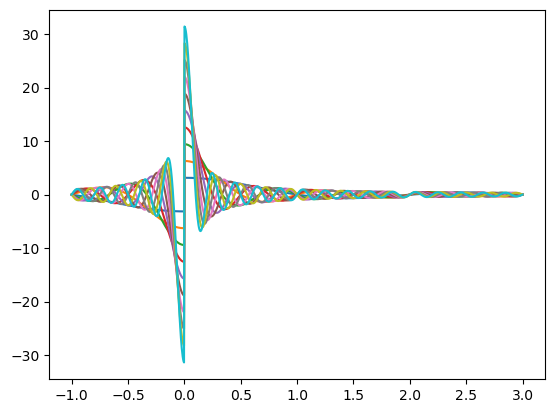

In [5]:
bessel = BesselEmbedding(num_frequencies=10, flip_negative=True)

x = torch.linspace(-1, 3, 1000)
y = bessel.compute_embedding(x[:, None])

plt.plot(x, y.detach().numpy())
plt.show()

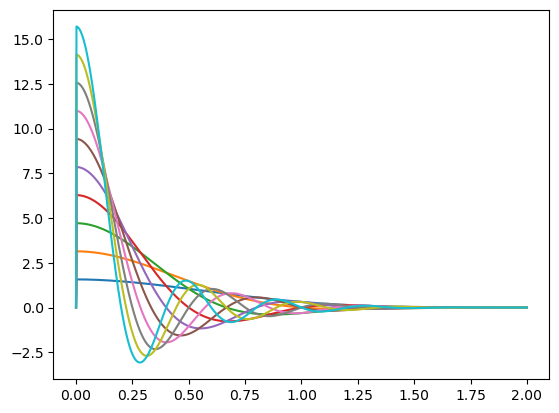

In [6]:
bessel = BesselEmbedding(num_frequencies=10, cutoff=2, envelope=EnvelopePoly(2))

x = torch.linspace(0, 2, 1000)
y = bessel.compute_embedding(x[:, None])

plt.plot(x, y.detach().numpy())
plt.show()

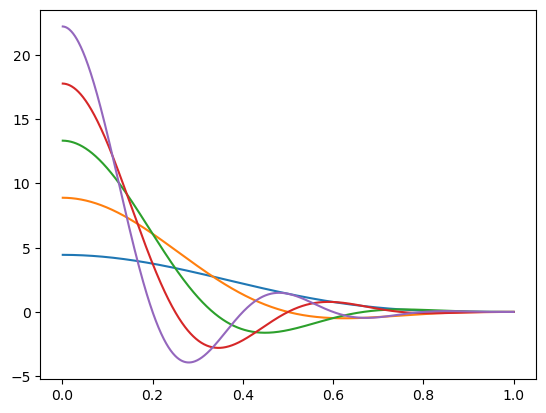

In [7]:
bessel = BesselEmbedding(num_frequencies=5, cutoff=1, envelope=EnvelopeCosine())

x = torch.linspace(0.001, 1, 1000)
y = bessel.compute_embedding(x[:, None])

plt.plot(x, y.detach().numpy())
plt.show()

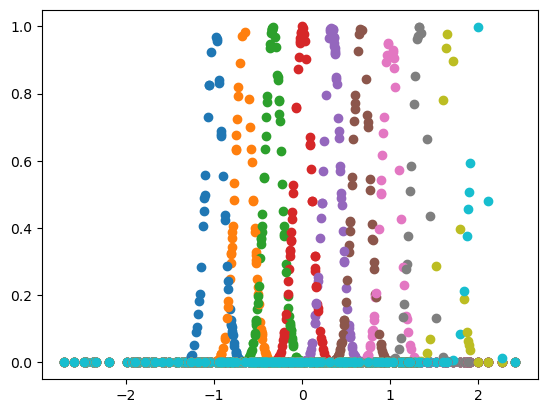

In [28]:
# test axial from radial:
from tensorframes.nn.embedding.axial import AxisWiseEmbeddingFromRadial

gauss = GaussianEmbedding(
    num_gaussians=10,
    normalized=False,
    minimum_initial_range=-1,
    maximum_initial_range=2,
    intersection=0.2,
)

ax_gauss = AxisWiseEmbeddingFromRadial(
    radial_embedding=gauss, axis_specific_radial=False, normalize_edge_vec=False
)

edge_vec = torch.randn(100, 3)

ax_emb = ax_gauss(edge_vec=edge_vec)

# plot per axis:
for i in range(3):
    plt.plot(
        edge_vec[:, i].detach().numpy(),
        ax_emb[:, i * 10 : (i + 1) * 10].detach().numpy(),
        marker="o",
        linestyle="None",
    )

In [37]:
edge_vec = torch.randn(100, 3, requires_grad=True)

ax_emb = ax_gauss(edge_vec=edge_vec)

ax_emb.sum().backward()
torch.isnan(edge_vec.grad).any()
edge_vec.grad.max(), edge_vec.grad.min()

[(param, param.grad) for param in ax_gauss.radial_modules.parameters()]

[(Parameter containing:
  tensor([-1.0000e+00, -6.6667e-01, -3.3333e-01,  2.9802e-08,  3.3333e-01,
           6.6667e-01,  1.0000e+00,  1.3333e+00,  1.6667e+00,  2.0000e+00],
         requires_grad=True),
  tensor([ 107.0757,   93.6525,   10.1673,   13.6983, -139.5473, -258.5399,
          -157.8729,    9.7729, -108.9245,    0.8707])),
 (Parameter containing:
  tensor([0.0929, 0.0929, 0.0929, 0.0929, 0.0929, 0.0929, 0.0929, 0.0929, 0.0929,
          0.0929], requires_grad=True),
  tensor([1446.0221, 1767.3638, 2076.4353, 2272.6755, 2350.0537, 1923.5889,
          1422.0999, 1054.0710,  636.7299,  367.9673]))]

In [39]:
[(name, param, param.grad) for name, param in ax_gauss.radial_modules.named_parameters()]

[('shift',
  Parameter containing:
  tensor([-1.0000e+00, -6.6667e-01, -3.3333e-01,  2.9802e-08,  3.3333e-01,
           6.6667e-01,  1.0000e+00,  1.3333e+00,  1.6667e+00,  2.0000e+00],
         requires_grad=True),
  tensor([ 107.0757,   93.6525,   10.1673,   13.6983, -139.5473, -258.5399,
          -157.8729,    9.7729, -108.9245,    0.8707])),
 ('scale',
  Parameter containing:
  tensor([0.0929, 0.0929, 0.0929, 0.0929, 0.0929, 0.0929, 0.0929, 0.0929, 0.0929,
          0.0929], requires_grad=True),
  tensor([1446.0221, 1767.3638, 2076.4353, 2272.6755, 2350.0537, 1923.5889,
          1422.0999, 1054.0710,  636.7299,  367.9673]))]

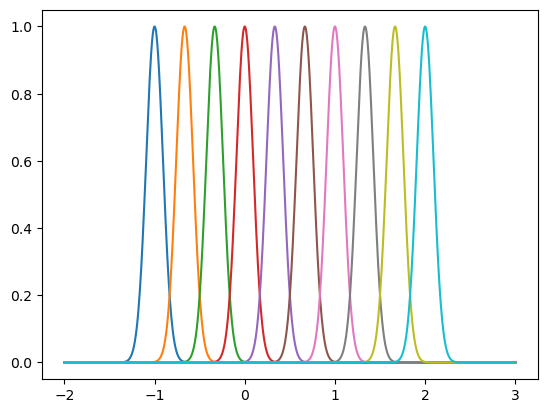

In [24]:
# visualize radial modules:
x = torch.linspace(-2, 3, 1000)

plt.plot(x, ax_gauss.radial_modules.compute_embedding(x[:, None]).detach().numpy())
plt.show()

In [21]:
ax_gauss.radial_modules.compute_embedding(x[:, None]).detach().numpy().shape

(1000, 10)